In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
plt.style.use('ggplot')

# Data Understanding

In [306]:
movies = pd.read_csv("movies.csv")

In [307]:
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [308]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [309]:
movies.describe(include="all")

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
count,9999,9355,9919,8179.000000,9999,9999,8179,7041.000000,460
unique,6817,438,510,NaN,8688,7877,4129,NaN,332
top,Bleach: Burîchi,(2020– ),\nComedy,NaN,\nAdd a Plot\n,\n,7,NaN,$0.01M
freq,65,892,852,NaN,1265,456,35,NaN,22
mean,NaN,NaN,NaN,6.921176,NaN,NaN,NaN,68.688539,NaN
std,NaN,NaN,NaN,1.220232,NaN,NaN,NaN,47.258056,NaN
min,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,6.200000,NaN,NaN,NaN,36.000000,NaN
50%,NaN,NaN,NaN,7.100000,NaN,NaN,NaN,60.000000,NaN
75%,NaN,NaN,NaN,7.800000,NaN,NaN,NaN,95.000000,NaN


### Noticed issues:
- Movies column had several duplicates
- Years column had brackets and dashes and even roman numericals
- Genre column values are several different genres jammed into a single string
- Rating column had missing values
- One-line column has not much use.
- Starts column has directors and main stars all jammed into a single column
- Votes column has over 1000 missing values


# Data Preparation

### Movies column

The movies column has several hundred duplicate values. However, several more duplicate values are hidden with an empty space at the start/end of the movie title. Hence, stripping empty spaces from  movie names

In [310]:
# Dropping movie duplicates BEFORE stripping empty spaces
movies.drop_duplicates(subset=["MOVIES"]).MOVIES.describe() # 6817 unique values

count              6817
unique             6817
top       Blood Red Sky
freq                  1
Name: MOVIES, dtype: object

In [311]:
# Stripping empty spaces from movies column.
movies.MOVIES = movies.MOVIES.str.strip(" ") 
movies.MOVIES.unique()

array(['Blood Red Sky', 'Masters of the Universe: Revelation',
       'The Walking Dead', ..., 'The Talk', 'Kajko i Kokosz',
       "God's Favorite Idiot"], dtype=object)

In [312]:
# Dropping movie columns after white space has been removed
movies.drop_duplicates(subset=["MOVIES"], inplace=True) 
movies.MOVIES.describe() 
# As seen in output window, nearly 400 rows were duplicates with an extra " "

count              6423
unique             6423
top       Blood Red Sky
freq                  1
Name: MOVIES, dtype: object

### Year column

The year column consists of several incorrectly formatted values.
<br>
What we want: (1990, 2000, 2010)
<br>
What we have: (TV 1990, IX, XIV, (XI) (1990-2005))

Firstly, I will strip out all brackets from every single value

In [313]:
movies.YEAR = movies.YEAR.str.strip(")").str.strip("(")

movies.YEAR.unique()

array(['2021', '2021– ', '2010–2022', '2013– ', '2020– ', '2006–2013',
       '2019– ', '2016–2021', '2011– ', '2005– ', '2008–2013', '2017– ',
       '2017–2021', '2016– ', '1994–2004', '2014– ', '2013–2020',
       '2015– ', '2005–2020', '2013–2022', '2003– ', '2009–2020',
       'I) (2018– ', '2010–2015', '2011–2019', '2015–2020', '2005–2014',
       '2009–2015', '2008–2014', '2016–2018', '2009–2017', '2020',
       '2018–2021', '2017–2020', '1987–1994', '2018– ', '2012– ',
       '2014–2020', '2011–2018', '2005–2017', '2017', '2007–2015',
       '2000–2007', 'II) (2007– ', '1993', '1999–2022', '2015–2018',
       '2014–2019', '2016', '2012–2020', '2013–2019', '2007–2012',
       '2011–2020', '2010–2017', '2000–2015', '2015–2021', '2001',
       '1997– ', '2011–2017', '1993–1999', '1989–1998', '2010–2013',
       '2010–2020', '2003–2019', 'I) (2019', '2017–2019', '1975',
       '2005–2008', '1995–2001', '2006', '2015–2017', '2008–2020',
       '1984–1996', '2010– ', '2014', '2000', 

In [314]:
def clean_movies(series):
    if series == series:
        if len(series.split(") (")) > 1:
            return series.split(") (")[-1]
        else:
            return series
    else:
        return series

The function aboves checks if the value is NaN, then, it checks if splitting the value by ") (" returns two or more values. If it does, I want to take the last value of the splitted list. This is because there are incorrectly formatted values that look like this:
<br>
"(XI) (1990-2005)"

Finally, I will get the first 4 digits of the column values, then drop the row if the column value is not of type integer/numerical / is NaN

In [315]:
movies.YEAR = movies.YEAR.apply(clean_movies).str[:4]

for index, row in movies.iterrows():
    if (row["YEAR"] != row["YEAR"] or row["YEAR"].isdigit() == False):
        movies.drop(index, inplace=True)

movies.YEAR = movies.YEAR.astype("int")

movies.YEAR.unique()

array([2021, 2010, 2013, 2020, 2006, 2019, 2016, 2011, 2005, 2008, 2017,
       1994, 2014, 2015, 2003, 2009, 2018, 1987, 2012, 2007, 2000, 1993,
       1999, 2001, 1997, 1989, 1975, 1995, 1984, 1998, 1966, 1990, 2002,
       1976, 1978, 2022, 1982, 1968, 2004, 1996, 1971, 1980, 1962, 1960,
       1988, 1969, 1961, 1979, 1956, 1983, 1986, 1967, 1974, 1992, 1958,
       1932, 1941, 1991, 1950, 1981, 1952, 1957, 1954, 1955, 1948, 1947,
       1946, 1977, 2023, 1945, 1953, 1985, 1973, 1972, 1965, 1944, 1933,
       1938])

### Genre column

In [316]:
movies.GENRE.unique()

array(['\nAction, Horror, Thriller            ',
       '\nAnimation, Action, Adventure            ',
       '\nDrama, Horror, Thriller            ',
       '\nAnimation, Adventure, Comedy            ',
       '\nAction, Crime, Horror            ',
       '\nAction, Crime, Drama            ',
       '\nDrama, Romance            ',
       '\nCrime, Drama, Mystery            ', '\nComedy            ',
       '\nAction, Adventure, Thriller            ',
       '\nCrime, Drama, Fantasy            ',
       '\nDrama, Horror, Mystery            ',
       '\nComedy, Drama, Romance            ',
       '\nCrime, Drama, Thriller            ', '\nDrama            ',
       '\nComedy, Drama            ',
       '\nDrama, Fantasy, Horror            ',
       '\nComedy, Romance            ',
       '\nAction, Adventure, Drama            ',
       '\nCrime, Drama            ',
       '\nDrama, History, Romance            ',
       '\nHorror, Mystery            ', '\nComedy, Crime            ',
     

To do:
- Strip out whitespace
- Strip out "\n"

Stripping out whitespace values & "\n"

In [317]:
movies.GENRE = movies.GENRE.str.strip(" ").str.strip("\n")

In [318]:
movies.GENRE.unique()

array(['Action, Horror, Thriller', 'Animation, Action, Adventure',
       'Drama, Horror, Thriller', 'Animation, Adventure, Comedy',
       'Action, Crime, Horror', 'Action, Crime, Drama', 'Drama, Romance',
       'Crime, Drama, Mystery', 'Comedy', 'Action, Adventure, Thriller',
       'Crime, Drama, Fantasy', 'Drama, Horror, Mystery',
       'Comedy, Drama, Romance', 'Crime, Drama, Thriller', 'Drama',
       'Comedy, Drama', 'Drama, Fantasy, Horror', 'Comedy, Romance',
       'Action, Adventure, Drama', 'Crime, Drama',
       'Drama, History, Romance', 'Horror, Mystery', 'Comedy, Crime',
       'Action, Drama, History', 'Action, Adventure, Crime',
       'Action, Adventure, Fantasy', 'Action, Crime, Mystery',
       'Drama, Fantasy, Romance', 'Drama, Sci-Fi, Thriller',
       'Biography, Drama, History', 'Crime, Thriller',
       'Comedy, Crime, Drama', 'Drama, Mystery, Thriller',
       'Action, Adventure, Mystery', 'Action, Comedy',
       'Crime, Drama, Horror', 'Drama, Mystery, Sc

For data cleaning, I will stop here with the Genre's column. However, I plan to transpose each genre (Action, adventure ,comedy, etc) into their own columns later on.

### Rating

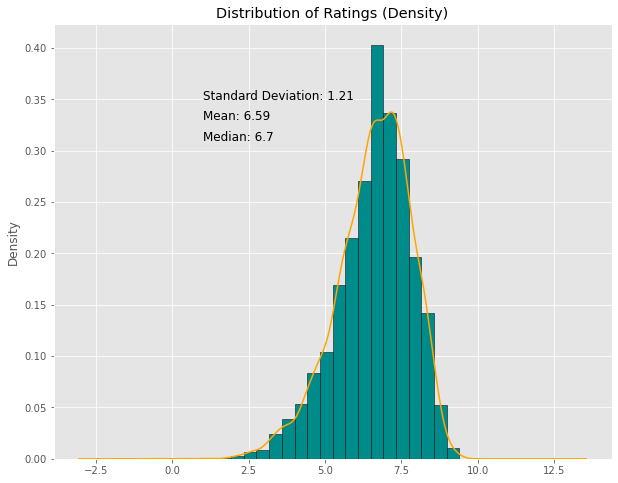

In [319]:
# Plotting a histogram and KDE to see distribution of Ratings
fig, ax = plt.subplots(figsize=(10, 8))
ax = movies.RATING.plot.hist(density=True, color="darkcyan", bins=20, edgecolor="black")
ax = movies.RATING.plot.kde(c="orange")

ax.annotate(f"Median: {round(movies.RATING.median(), 2)}", xy=(1, 0.31), fontsize=12)
ax.annotate(f"Mean: {round(movies.RATING.mean(), 2)}", xy=(1, 0.33), fontsize=12)
ax.annotate(f"Standard Deviation: {round(movies.RATING.std(), 2)}", xy=(1, 0.35), fontsize=12)

ax.set_title("Distribution of Ratings (Density)")

plt.show()

In [320]:
movies.RATING = movies.RATING.fillna(movies.RATING.mean())

Because the distribution of the movie ratings is not skewed, I am filling null values with the mean rating.

In [321]:
movies.RATING = [round(x, 2) for x in movies.RATING]

In [322]:
movies.RATING.describe()

count    5911.000000
mean        6.594037
std         1.173472
min         1.100000
25%         5.900000
50%         6.600000
75%         7.400000
max         9.400000
Name: RATING, dtype: float64

### One-Line

In [323]:
movies["ONE-LINE"] = movies["ONE-LINE"].str.strip("\n")

### Stars

The Stars column will be separated into two columns: Director & Stars. The Director column will contain the name of the Director of the Movie, and the Stars column will contain the names of stars that acted in the movie

In [324]:
movies.STARS = movies.STARS.str.replace("\n", "").str.rstrip(" ") ### Cleaning "\n" and empty spaces

directors = []
stars = []

for x in movies.STARS:
    dir_star = x.split("|")
    if len(dir_star) == 2: ### If the director is present
        directors.append(dir_star[0].split(":")[1])
        stars.append(dir_star[1].split(":")[1])
    elif len(dir_star) == 1 and dir_star[0] != "": ### If no director and not empty string
        directors.append(np.nan)
        stars.append(dir_star[0].split(":")[1])
    else: # if empty string
        directors.append(np.nan)
        stars.append(np.nan)

### Creating new columns
movies["director"] = directors
movies["stars"] = stars

### Result
movies[["STARS", "director", "stars"]]  

,STARS,director,stars
0,Director:Peter Thorwarth| Stars:Peri B...,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,"Stars:Chris Wood, Sarah Michel...",NaN,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,"Stars:Andrew Lincoln, Norman R...",NaN,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,"Stars:Justin Roiland, Chris Pa...",NaN,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Director:Matthias Schweighöfer| Stars:...,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."
...,...,...,...
9176,"Directors:Mikhail Plata, Michael Fuer, Mej...","Mikhail Plata, Michael Fuer, Mejo Joseph, Norm...","Tian Brass, Kerr Logan, Natalia Rosminati, Emi..."
9304,"Stars:Abish Mathew, Abhishek B...",NaN,"Abish Mathew, Abhishek Bachchan, Inayat Verma,..."
9314,Director:Ken Whittingham| Stars:Jamie ...,Ken Whittingham,"Jamie Foxx, David Alan Grier, Kyla-Drew, Porsc..."
9463,"Stars:Sharon Osbourne, Sheryl ...",NaN,"Sharon Osbourne, Sheryl Underwood, Carrie Ann ..."


In [325]:
movies.drop("STARS", axis=1, inplace=True)

movies.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'VOTES', 'RunTime',
       'Gross', 'director', 'stars'],
      dtype='object')

### Votes

1. Convert from object type to numerical (float/int). 
2. Check for outliers

In [326]:
movies["VOTES"] = movies["VOTES"].str.replace(",", "").astype("float") # Replacing comma in column values, then converting to float 

movies["VOTES"].dtype # Correct dtype now.

dtype('float64')

In [327]:
### Checking for outliers
movies["VOTES"].describe()

count    5.516000e+03
mean     2.187453e+04
std      8.414396e+04
min      5.000000e+00
25%      4.080000e+02
50%      1.660500e+03
75%      7.656250e+03
max      1.713028e+06
Name: VOTES, dtype: float64

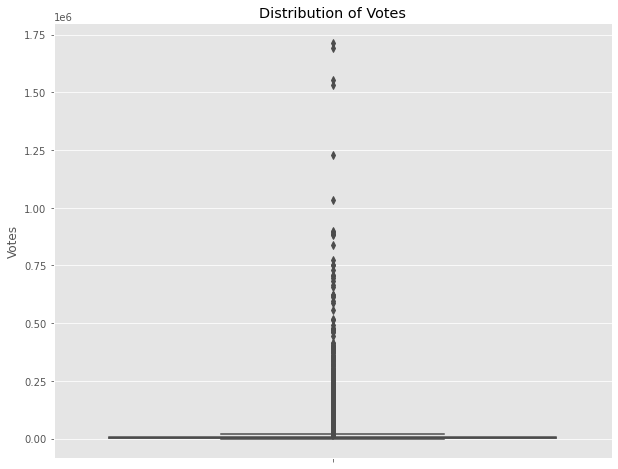

In [328]:
fig, ax_vote = plt.subplots(figsize=(10,8))
sns.boxplot(data=movies["VOTES"], ax=ax_vote, color="red")

ax_vote.set_title("Distribution of Votes")
ax_vote.set_xticklabels([""])
ax_vote.set_ylabel("Votes")

plt.show()

In [329]:
movies.loc[movies["VOTES"] >= 1000000] # Manually seeing rows with high votes

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,director,stars
16,Breaking Bad,2008,"Crime, Drama, Thriller",9.4,A high school chemistry teacher diagnosed with...,1552311.0,49.0,NaN,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B..."
111,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,1713028.0,178.0,$315.54M,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean..."
132,The Departed,2006,"Crime, Drama, Thriller",8.5,An undercover cop and a mole in the police att...,1227522.0,151.0,$132.38M,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,..."
156,Kill Bill: Vol. 1,2003,"Action, Crime, Drama",8.1,"After awakening from a four-year coma, a forme...",1034554.0,111.0,$70.10M,Quentin Tarantino,"Uma Thurman, David Carradine, Daryl Hannah, Mi..."
193,The Lord of the Rings: The Return of the King,2003,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,1691777.0,201.0,$377.85M,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or..."
260,The Lord of the Rings: The Two Towers,2002,"Action, Adventure, Drama",8.7,While Frodo and Sam edge closer to Mordor with...,1529752.0,179.0,$342.55M,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or..."


As it is reasonable for a movie / tv series to have over a million votes, I will keep them in the dataset.

### RunTime

1. Find outliers (if any)

In [330]:
movies["RunTime"].describe()

count    5067.000000
mean       80.273337
std        49.949707
min         1.000000
25%        48.000000
50%        85.000000
75%       101.000000
max       853.000000
Name: RunTime, dtype: float64

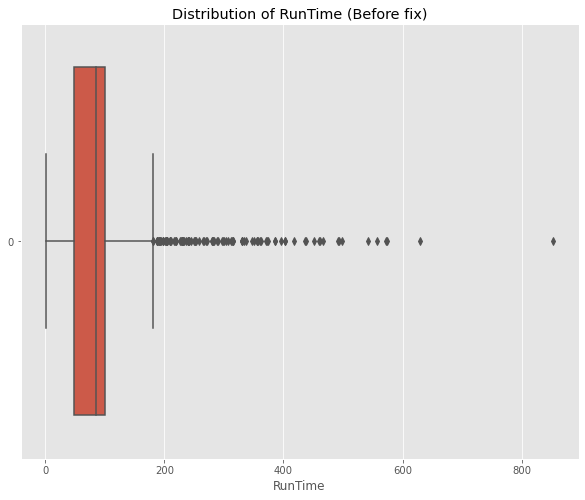

In [331]:
fig, ax_runtime = plt.subplots(figsize=(10, 8))
sns.boxplot(data=movies["RunTime"], orient="h", ax=ax_runtime)

ax_runtime.set_title("Distribution of RunTime (Before fix)")
ax_runtime.set_xlabel("RunTime")

plt.show()

In [332]:
movies.loc[movies["RunTime"] > 240]

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,director,stars
60,The Queen's Gambit,2020,Drama,8.6,"Orphaned at the tender age of nine, prodigious...",336801.0,395.0,NaN,NaN,"Anya Taylor-Joy, Chloe Pirrie, Bill Camp, Marc..."
201,The Haunting of Hill House,2018,"Drama, Horror, Mystery",8.6,"Flashing between past and present, a fractured...",195117.0,572.0,NaN,NaN,"Michiel Huisman, Carla Gugino, Henry Thomas, E..."
207,El inocente,2021,"Crime, Drama, Mystery",7.9,An accidental killing leads a man down a dark ...,19980.0,467.0,NaN,NaN,"Mario Casas, Xavi Sáez, Santi Pons, Sam Feuer"
301,Behind Her Eyes,2021,"Drama, Mystery, Thriller",7.2,"It follows Louise, a single mom with a son and...",47174.0,298.0,NaN,NaN,"Simona Brown, Eve Hewson, Tom Bateman, Robert ..."
331,Unbelievable,2019,"Crime, Drama",8.4,A teenager is charged with lying about having ...,81658.0,385.0,NaN,NaN,"Kaitlyn Dever, Toni Collette, Merritt Wever, B..."
...,...,...,...,...,...,...,...,...,...,...
2869,El caso Alcàsser,2019,"Documentary, Crime",7.1,True crime documentary examining one of the mo...,1832.0,303.0,NaN,NaN,"Fernando García, León Siminiani, Ramón Campos,..."
3941,My Love: Six Stories of True Love,2021,"Documentary, Romance",7.5,Six longtime couples in different parts of the...,228.0,418.0,NaN,NaN,"Arya, Asmita, David Isham, Ginger Isham"
4064,Bobby Kennedy for President,2018,"Documentary, Biography, Drama",8.2,This four-part documentary series weaves toget...,1601.0,245.0,NaN,NaN,"Peter Edelman, Paul Schrade, William Arnone, H..."
4646,Nisman,2019,"Documentary, Crime, History",7.7,"The suspicious death of Alberto Nisman, invest...",515.0,373.0,NaN,NaN,"Laura Alonso, James Bernazzani, Sergio Berni, ..."


I faced a dilemma while thinking whether I should remove outliers in the RunTime column. Some rows contain the TOTAL RunTime of a series, while others only contain the RunTime for 1 episode.
<br>
<br>
This can cause issues were I to use this dataset for ML training and testing. Hence, to solve this issue, I will divide the runtime of rows with runtime > 240 (4 hours) by 10. 
<br>
<br>
This solution is not the best idea (as some tv series have more/less episodes than 10). However, it returns the most suitable values for the dataset.

In [333]:
fix_runtime = [x / 10 if x > 200 else x for x in movies["RunTime"]] # If runtime > 200, divide by 10, else remain the same

movies["RunTime"] = fix_runtime

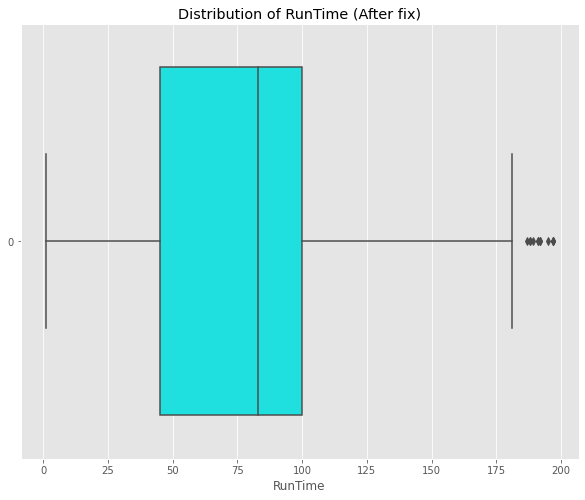

count    5067.000000
mean       75.102112
std        35.007485
min         1.000000
25%        45.000000
50%        83.000000
75%       100.000000
max       197.000000
Name: RunTime, dtype: float64

In [334]:
fig, ax_runtime = plt.subplots(figsize=(10, 8))
sns.boxplot(data=movies["RunTime"], orient="h", ax=ax_runtime, color="cyan")

ax_runtime.set_title("Distribution of RunTime (After fix)")
ax_runtime.set_xlabel("RunTime")

plt.show()
movies["RunTime"].describe()

### Gross

1. Strip "$" and "M"
2. Convert to float
3. Find outliers?

In [335]:
movies["Gross"] = movies["Gross"].str.strip("$").str.strip("M").astype("float")

movies["Gross"].describe() # Min and max values are in reasonable range, hence no need to remove outliers.

count    452.000000
mean      43.911394
std       82.596349
min        0.000000
25%        0.157500
50%        6.420000
75%       47.492500
max      504.010000
Name: Gross, dtype: float64

### Renaming & Rearranging columns

In [336]:
movies.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'VOTES', 'RunTime',
       'Gross', 'director', 'stars'],
      dtype='object')

In [337]:
movies.rename({'MOVIES':"name", 'YEAR':'release_year', 'GENRE':'genre', 'RATING':'rating', 
               'ONE-LINE':'synopsis', 'VOTES':'votes', 'RunTime':'runtime'}, axis=1, inplace=True)

In [338]:
movies = movies[['name', 'release_year', 'genre', 'synopsis', 
                 'rating','director', 'stars','runtime', 
                 'votes','Gross', ]]

# Final Dataframe

In [339]:
movies.head()

,name,release_year,genre,synopsis,rating,director,stars,runtime,votes,Gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",A woman with a mysterious illness is forced in...,6.10,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",121.0,21062.0,NaN
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",The war for Eternia begins again in what may b...,5.00,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",25.0,17870.0,NaN
2,The Walking Dead,2010,"Drama, Horror, Thriller",Sheriff Deputy Rick Grimes wakes up from a com...,8.20,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBride...",44.0,885805.0,NaN
3,Rick and Morty,2013,"Animation, Adventure, Comedy",An animated series that follows the exploits o...,9.20,NaN,"Justin Roiland, Chris Parnell, Spencer Grammer...",23.0,414849.0,NaN
4,Army of Thieves,2021,"Action, Crime, Horror","A prequel, set before the events of Army of th...",6.59,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",NaN,NaN,NaN


### Writing to CSV

In [340]:
movies.to_csv("movies_cleaned")